# Friction factor with the Colebrook-White equation
by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of Computational and Data Sciences

Penn State University

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/
____________________________________________________

In [6]:
#Do not change this cell. It is for setting things up.

#make plots inline
%matplotlib inline

#import the preamble in the parent directory
import sys
sys.path.append("../../")
from preamble import *

In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

## Introduction
In many engineering application where fluid moves along a pipe or channel, it is important to know the head loss (or pressure drop) due to friction. This loss is a function of several variables, including pipe (channel) length and roughness. The functional relationship is usually referred to as the Darcy-Weisbach equation which can be written in the head-loss form as
\begin{equation}
 h_f = f_D \frac{L}{D}\frac{V^2}{2g}
\end{equation}
where $h_f$ is the frictional head loss ([L]), $f_D$ is the dimensionless Darcy friction factor, $L$ is the pipe (or channel) length, $D$ is the hydraulic diameter (=$4A/P$ with $A$ being the cross-sectional area and $P$ being the wetted perimeter), and $V$ is the mean velocity. In order to calculate the head loss, one key parameter is the friction factor, which can be calculated with the Colebrook-White equation (among many others):
\begin{equation}
\frac{1}{\sqrt{f_D}} = -2 \log \left(\frac{\epsilon}{3.7 D} + \frac{2.51}{Re \sqrt{f_D}} \right)
\end{equation}
This equation relates (implicitly) the friction factor to the Reynolds number $Re$ and the pipe relative roughness $\epsilon/D$. And it only applies for $Re$ > 4,000. Due to its implicit nature, one needs to solve it numerically to use it. Due to its wide use in science and engineering, there are many different ways (graphically, numerically, or semi-numerically) to solve this. Here, we show the use the bisection method. One can also use the Newton-Raphson method. However, the derivative may be complicated to evaluate. 

For comparison, one explicit fit of the Colebrook-White equation is the Haaland equation:
\begin{equation}
  \frac{1}{\sqrt{f_D}} = -1.8 \log \left[ \left(\frac{\epsilon/D}{3.7} \right)^{1.11} + \frac{6.9}{Re} \right]
\end{equation}

The flow and pipe conditions are as follows:
* Reynolds number $Re$ = 60,000
* roughness height $\epsilon$ = 0.001 m
* hydraulic diameter $D$ = 0.5 m

## Bisection method
The equation is first re-written as 
\begin{equation}
f(f_D) = \frac{1}{f_D} + 2 \log \left(\frac{\epsilon}{3.7 D} + \frac{2.51}{Re \sqrt{f_D}} \right) = 0
\end{equation}
which can be solved with the Bisection method.


In [4]:
import matplotlib.pyplot as plt 
import numpy as np 

#a function return the sign of x
def sgn(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

#bisect the range (a, b) based on the signs
#of f(a), f(b) and f((a+b)/2)
def bisect(f,a,b,e,D,Re):
    fa = f(a,e,D,Re)
    fb = f(b,e,D,Re)
    p = (a+b)/2.0
    fp = f(p,e,D,Re)
    if sgn(fa) == sgn(fp):
        return p, b
    else:
        return a, p

#call the bisection method for n iterations
def bisection_iterations(f,e,D,Re,a,b,eps,Nmax):
    #iteration number
    n = 0
    xr_old = (a+b)/2.0
    eps_r = 0.0
    while True:
        n = n + 1
        
        if(n > Nmax):
            print("Maximum iteration number reached!")
            break;
            
        a,b = bisect(f,a,b,e,D,Re)
        #calculate relative error
        xr_new = (a+b)/2.0
        eps_r = abs((xr_new-xr_old)/xr_new)*100
        #print("Iteration %d: eps_r = %.3f" % (n, eps_r))
        if(eps_r < eps): 
            break;
        else: 
            xr_old = xr_new
        
    return ((a+b)/2.0),n

def f(x,e,D,Re):
    return 1.0/np.sqrt(x)+2.0*np.log10(e/3.7/D+2.51/Re/np.sqrt(x))


#define variables
e = 0.001    #roughness height
D = 0.5      #hydraulic diameter
Re = 60000   #Reynolds number

#reasonable bounds for the solution
a = 0.1
b = 1e-4

#
eps = 1e-4

Nmax = 100

f_D,n = bisection_iterations(f,e,D,Re,a,b,eps,Nmax)

print("The friction factor from the Colebrook-White equation with the Bisection method:")
print("f_D = ", f_D)

#check the solution with the explicit Haaland equation:
temp = -1.8*np.log10((e/D/3.7)**1.11 + 6.9/Re)
f_Haaland=(1.0/temp)**2.0
print("The friction factor from the explicit Haaland equation:")
print("f_D = ", f_Haaland)


The friction factor from the Colebrook-White equation with the Bisection method:
f_D =  0.02606342384815217
The friction factor from the explicit Haaland equation:
f_D =  0.025865761787458585


## Comparison with the Moody diagram

The Moody diagram is a graphical representation of the Colebrook-White equation. To have a visual inspection, the following makes a plot of the Moody diagram and locate the calculated result on it. In this case, the relative roughness $\epsilon/D$ = 0.001/0.5 = 0.002 and the Reynolds number $Re$ = 60,000. From the plotted figure, the calculated friction factor is right on the corresponding line. 

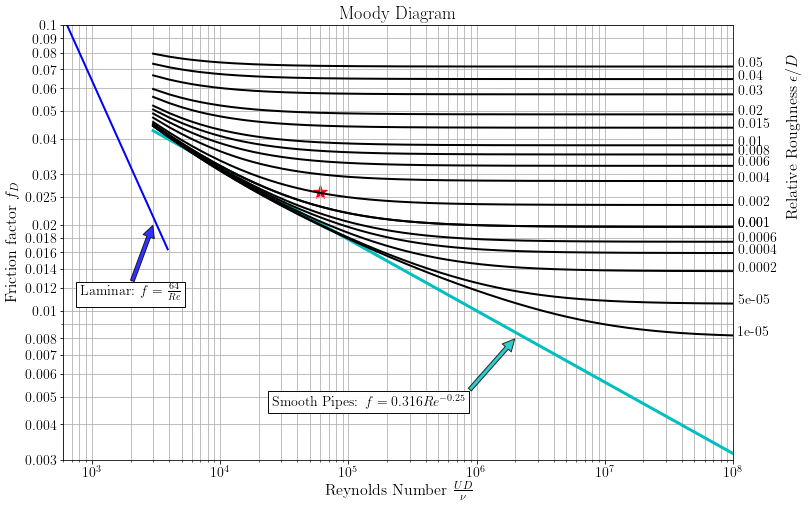

In [5]:
#This code is based on the following:
#http://community.dur.ac.uk/g.l.ingram/download/moody.py

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=14)

# the rangers of the plot
xmin = 600;
xmax = pow(10,8);
ymin = 0.003
ymax = 0.1;

ylabels =[]
ytickloc = [0.003,0.004,0.005,0.006,0.007,0.008,0.01,0.012,0.014,0.016,0.018,0.02,0.025,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
for i in ytickloc: 
    ylabels.append(str(i))

# Laminar regime
Relam =np.arange(600,4000,100)
flam = 64.0 / Relam

#Turbulent regime
Returb = np.arange(3000,pow(10,8),1000)
fsmooth = 0.316 * pow(Returb,-0.25) # Blausis formula for smooth turbulent pipe flow

#Rough Pipes
kdlabels = []
kd = [0.00001,0.00005,0.001,0.0002,0.0004,0.0006,0.001,0.002,0.004,0.006,0.008,0.01,0.015,0.02,0.03,0.04,0.05]
for i in kd: 
    kdlabels.append(str(i))
    
frough = []
for i in kd: # The formula used is the Haaland equation
    A = -1.8 * np.log10(6.9/Returb + pow( ((1/3.71) * i), 1.11) ) 
    f = pow(1.0/A,2)
    frough.append(f)

plt.figure(figsize = (12,8))
plt.xscale('log')
plt.yscale('log')

# Plot the data
plt.plot(Relam, flam, 'b', linewidth='2')
plt.plot(Returb, fsmooth, 'c', linewidth='3')
for (i,j) in zip(frough,kdlabels):
    plt.plot(Returb, i,'k',linewidth='2')
    plt.text(Returb[-1]*1.1,i[-1],j)

# Add some text data
plt.figtext(0.96,0.55,r'Relative Roughness $\epsilon/D$', rotation='vertical',size=16)

plt.annotate(r'Laminar: $f = \frac{64}{Re}$', xy=(3000, 0.02),  xycoords='data',
                xytext=(0.1, 0.4), textcoords='axes fraction', size = 14,
                arrowprops=dict(facecolor='b', shrink=0.01, alpha=0.8),
                horizontalalignment='center', verticalalignment='top',bbox=dict(facecolor='white', alpha=0.95)
                )
plt.annotate(r'Smooth Pipes: $f = 0.316 Re^{-0.25}$', xy=(2000000, 0.008),  xycoords='data',
                xytext=(0.6, 0.15), textcoords='axes fraction', size = 14,
                arrowprops=dict(facecolor='c', shrink=0.01, alpha=0.8),
                horizontalalignment='right', verticalalignment='top',bbox=dict(facecolor='white', alpha=0.95)
                )

#now add the value calculated above
plt.scatter(Re,f_D, marker='*', c='r',s=200)

# Axes details
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on 
plt.gca().yaxis.grid(True, which='minor')  # minor grid on 
plt.title('Moody Diagram', fontsize=18)
plt.ylabel(r'Friction factor $f_D$',fontsize=16)
plt.xlabel(r'Reynolds Number $\frac{U D}{\nu}$',fontsize=16)
plt.xlim( xmin, xmax )
plt.ylim( ymin,ymax )
plt.yticks(ytickloc,ylabels)
plt.savefig('moody.png',dpi = 600)
plt.show()